In [14]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [15]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

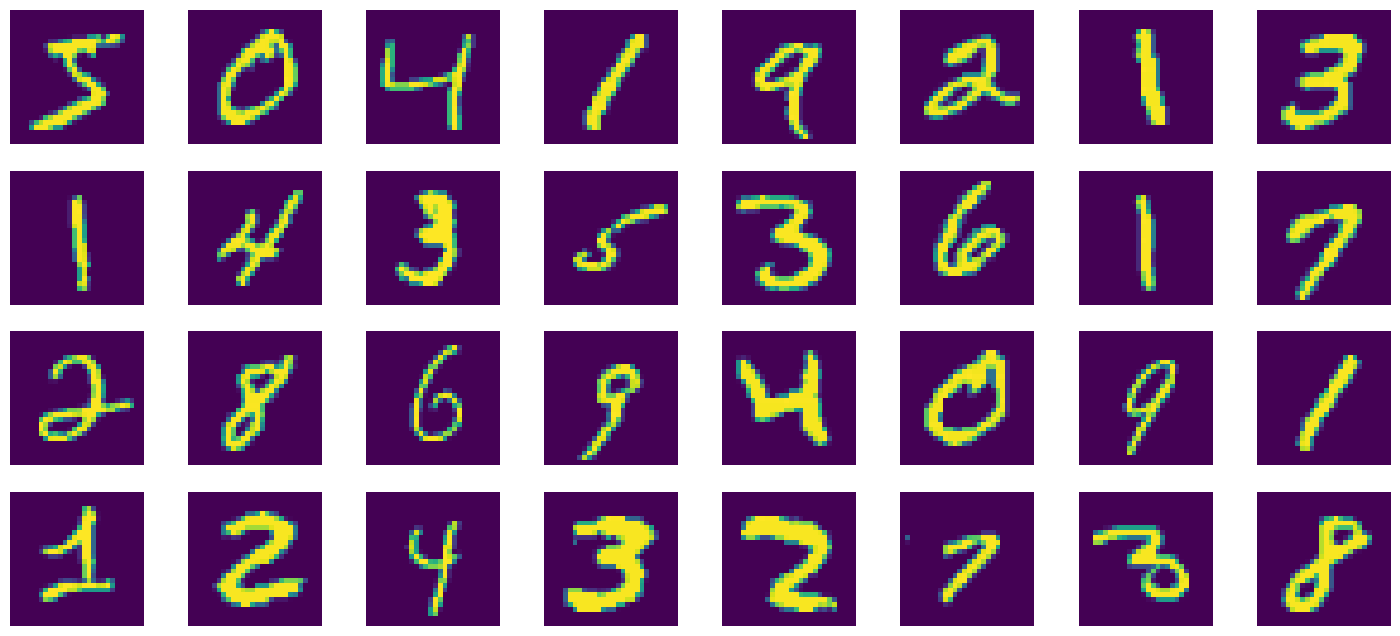

In [16]:
# Sample dataset
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i, :, :])
    plt.axis("off")

In [17]:
x_train[0].shape

(28, 28)

In [37]:
# Build CNN Model
model = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [38]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=256)

Epoch 1/20
188/188 [==============================] - 9s 45ms/step - loss: 0.2090 - accuracy: 0.9364 - val_loss: 0.0902 - val_accuracy: 0.9729
Epoch 2/20
188/188 [==============================] - 8s 41ms/step - loss: 0.0730 - accuracy: 0.9781 - val_loss: 0.0830 - val_accuracy: 0.9743
Epoch 3/20
188/188 [==============================] - 8s 42ms/step - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0678 - val_accuracy: 0.9805
Epoch 4/20
188/188 [==============================] - 9s 46ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 5/20
188/188 [==============================] - 8s 42ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 6/20
188/188 [==============================] - 8s 42ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0671 - val_accuracy: 0.9814
Epoch 7/20
188/188 [==============================] - 8s 43ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0813 - val_accuracy: 0.9787

In [40]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.1096 - accuracy: 0.9808


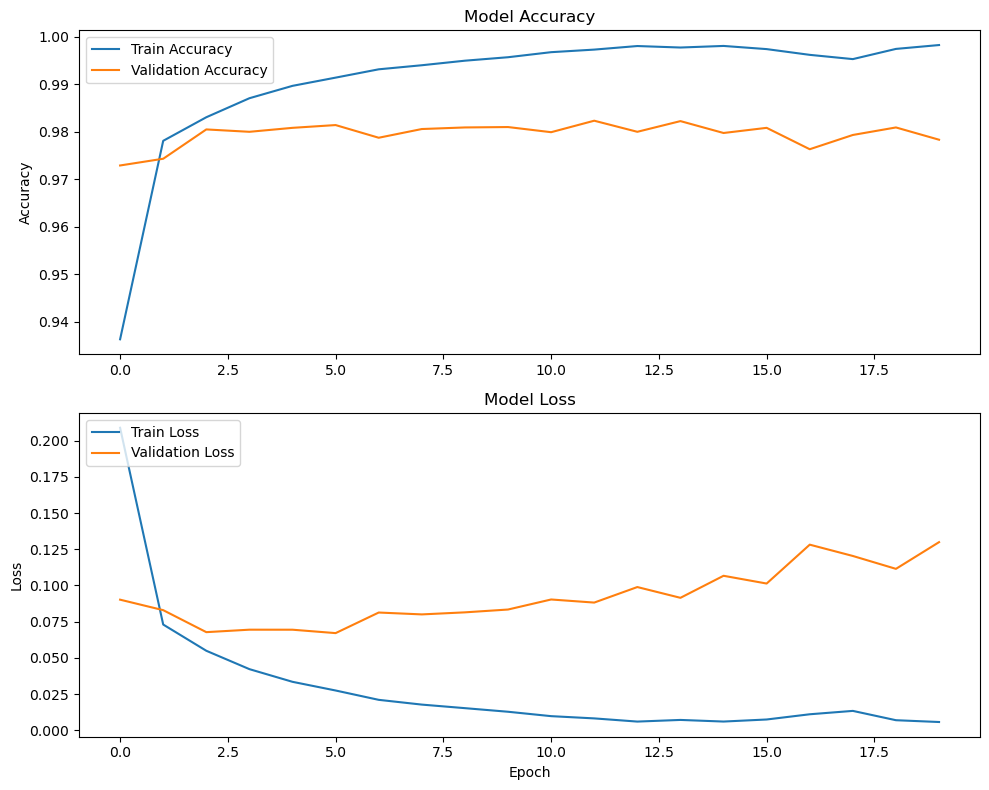

In [42]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

313/313 [==============================] - 7s 20ms/step


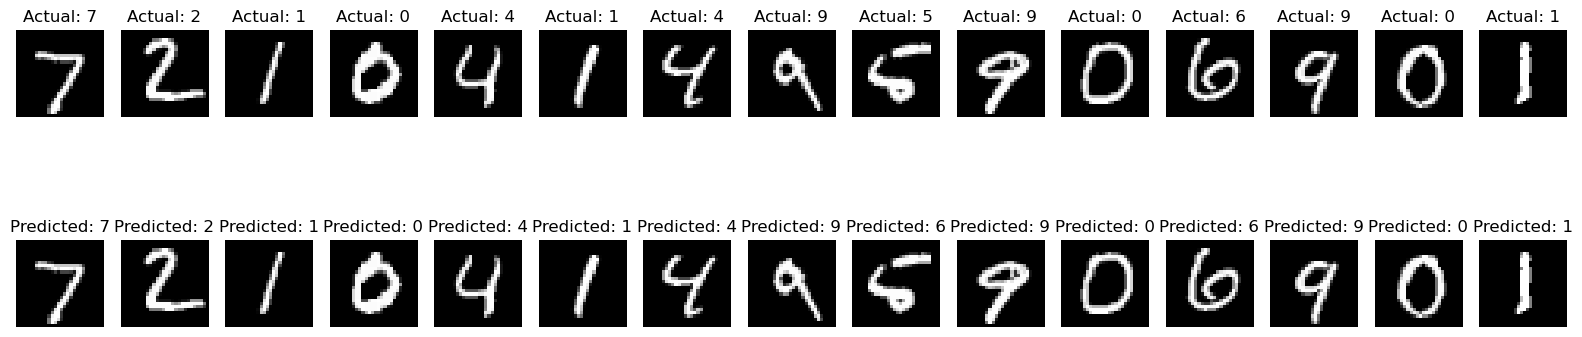

Test loss: 0.10956302285194397
Test accuracy: 0.9807999730110168


In [43]:
# Make predictions
predictions = model.predict(x_test)

# Plot predicted vs actual
num_images = 15 # Number of images to display
fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

for i in range(num_images):
    # Show the actual image
    axs[0, i].imshow(x_test[i], cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"Actual: {y_test[i]}")
    
    # Show the predicted image
    axs[1, i].imshow(x_test[i], cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f"Predicted: {np.argmax(predictions[i])}")

plt.show()

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

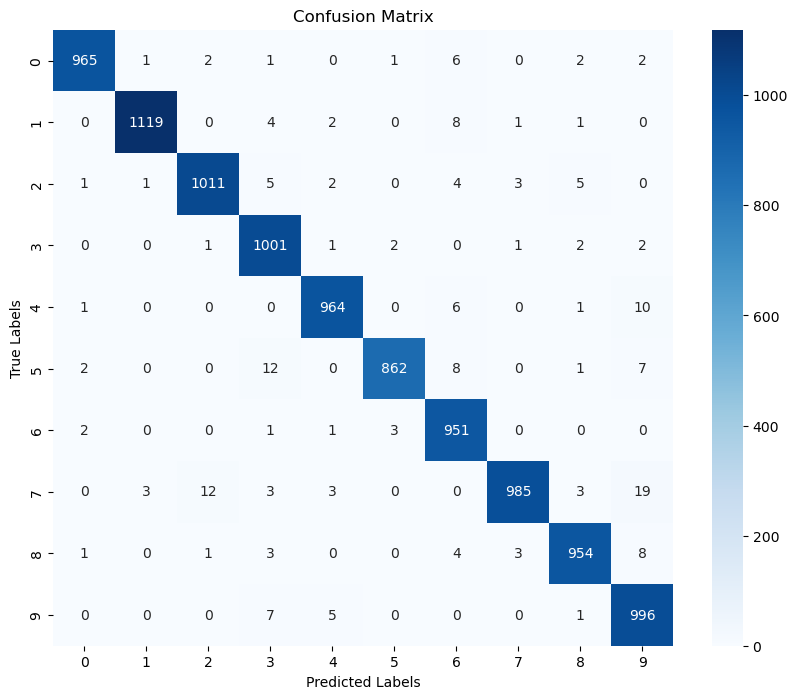

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()